[Tutorial](https://blog.patricktriest.com/police-data-python/)

### Importar as dependências

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

figsize = (16,8)

### Importar o dataset

In [2]:
df_vt = pd.read_csv('VT-clean.csv.gz', compression='gzip', low_memory=False)

## Exploração de dados em Vermont

<img src="vermont.png" />

### Visualizando os dados do dataset

In [3]:
# Visualizar as cinco primeiras linhas
df_vt.head()

,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,...,driver_race,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,officer_id
0,VT-2010-00001,VT,2010-07-01,00:10,East Montpelier,Washington County,50023.0,COUNTY RD,MIDDLESEX VSP,M,...,White,Moving Violation,Moving violation,False,No Search Conducted,NaN,False,Citation,False,-1.562157e+09
1,VT-2010-00002,VT,2010-07-01,00:10,NaN,NaN,NaN,COUNTY RD; Fitch Road,MIDDLESEX VSP,F,...,White,Externally Generated Stop,Other,False,No Search Conducted,NaN,False,Arrest for Violation,True,-1.562157e+09
2,VT-2010-00003,VT,2010-07-01,00:10,NaN,NaN,NaN,COUNTY RD; Fitch Road,MIDDLESEX VSP,F,...,White,Externally Generated Stop,Other,False,No Search Conducted,NaN,False,Arrest for Violation,True,-1.562157e+09
3,VT-2010-00004,VT,2010-07-01,00:11,Whiting,Addison County,50001.0,N MAIN ST,NEW HAVEN VSP,F,...,White,Moving Violation,Moving violation,False,No Search Conducted,NaN,False,Arrest for Violation,True,-3.126844e+08
4,VT-2010-00005,VT,2010-07-01,00:35,Hardwick,Caledonia County,50005.0,i91 nb mm 62,ROYALTON VSP,M,...,White,Moving Violation,Moving violation,False,No Search Conducted,NaN,False,Written Warning,False,9.225661e+08


In [4]:
# Visualizar as colunas
df_vt.columns

Index(['id', 'state', 'stop_date', 'stop_time', 'location_raw', 'county_name',
       'county_fips', 'fine_grained_location', 'police_department',
       'driver_gender', 'driver_age_raw', 'driver_age', 'driver_race_raw',
       'driver_race', 'violation_raw', 'violation', 'search_conducted',
       'search_type_raw', 'search_type', 'contraband_found', 'stop_outcome',
       'is_arrested', 'officer_id'],
      dtype='object')

### Verificar os valores

In [5]:
df_vt.count()

id                       283285
state                    283285
stop_date                283285
stop_time                283285
location_raw             282591
county_name              282580
county_fips              282580
fine_grained_location    282938
police_department        283285
driver_gender            281573
driver_age_raw           282114
driver_age               281999
driver_race_raw          279301
driver_race              278468
violation_raw            281107
violation                281107
search_conducted         283285
search_type_raw          281045
search_type                3419
contraband_found         283251
stop_outcome             280960
is_arrested              283285
officer_id               283273
dtype: int64

In [6]:
# Colocar o mesmo número de valores para cada campo
# Fill missing search type values with placeholder
df_vt['search_type'].fillna('N/A', inplace=True)

# Drop rows with missing values
df_vt.dropna(inplace=True)

df_vt.count()

id                       273181
state                    273181
stop_date                273181
stop_time                273181
location_raw             273181
county_name              273181
county_fips              273181
fine_grained_location    273181
police_department        273181
driver_gender            273181
driver_age_raw           273181
driver_age               273181
driver_race_raw          273181
driver_race              273181
violation_raw            273181
violation                273181
search_conducted         273181
search_type_raw          273181
search_type              273181
contraband_found         273181
stop_outcome             273181
is_arrested              273181
officer_id               273181
dtype: int64

In [7]:
### Listar os municipios e a quantidade de parada ocorreu
df_vt['county_name'].value_counts()

Windham County       37715
Windsor County       36464
Chittenden County    24815
Orange County        24679
Washington County    24633
Rutland County       22885
Addison County       22813
Bennington County    22250
Franklin County      19715
Caledonia County     16505
Orleans County       10344
Lamoille County       8604
Essex County          1239
Grand Isle County      520
Name: county_name, dtype: int64

<img src="map-vermont.png" />
<p style="text-align:center;">Visualização no Power BI</p>

### Motivos das paradas de trânsito

In [10]:
df_vt['violation'].value_counts()

Moving violation      212100
Equipment              50600
Other                   9768
DUI                      711
Other (non-mapped)         2
Name: violation, dtype: int64

- Moving Violation = excesso de velocidade, condução imprudente, etc.
- Equipment = luzes com defeito, modificações ilegais, etc.
- Other = Investigatory Stop(a polícia tem motivos para suspeitar que o motorista do veículo cometeu um crime), Externally Generated Stop(possivelmente como resultado de um acidente de carro);
- DUI = dirigir embriagado

### Resultados da parada

In [12]:
df_vt['stop_outcome'].value_counts()

Written Warning         166488
Citation                103401
Arrest for Violation      3206
Warrant Arrest              76
Verbal Warning              10
Name: stop_outcome, dtype: int64

A maioria das paradas resulta em uma advertência por escrito - que aparece no registro, mas não tem penalidade direta. Um pouco mais de 1/3 das paradas resultam em uma citação (comumente conhecida como ticket), que vem com uma multa direta e pode carregar outros efeitos colaterais negativos, como aumentar os prêmios de seguro de automóvel de um motorista.

A decisão de dar um aviso ou uma citação é muitas vezes a critério do policial, por isso pode ser uma boa fonte para estudar o preconceito.

### Paradas por sexo

In [13]:
df_vt['driver_gender'].value_counts()

M    174070
F     99111
Name: driver_gender, dtype: int64

Podemos ver que aproximadamente 36% das paradas são de mulheres, e 64% são de homens.

### Paradas por raça

In [16]:
df_vt['driver_race'].value_counts()

White       261339
Black         5571
Asian         3446
Hispanic      2562
Other          263
Name: driver_race, dtype: int64

A maioria das paradas de tráfego são de motoristas brancos, o que é esperado, já que <a href="https://www.census.gov/quickfacts/VT">Vermont tem cerca de 94% de brancos</a> (tornando-se o segundo estado menos diversificado do país, atrás do <a href="https://www.census.gov/quickfacts/ME">Maine</a> ). Como os motoristas brancos compõem aproximadamente 94% do tráfego, não há nenhuma tendência óbvia aqui para substituir motoristas não brancos e motoristas brancos. Usando a mesma metodologia, no entanto, também podemos ver que, enquanto os motoristas negros representam cerca de 2% de todo o tráfego, apenas <a href="https://www.census.gov/quickfacts/VT">1,3% da população de Vermont é negra</a>.

### Frequência de parada por raça e idade

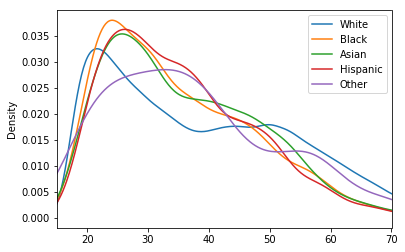

In [18]:
fig, ax = plt.subplots()
ax.set_xlim(15, 70)
for race in df_vt['driver_race'].unique():
    s = df_vt[df_vt['driver_race'] == race]['driver_age']
    s.plot.kde(ax=ax, label=race)
ax.legend()

- Podemos ver que os jovens condutores no final da adolescência e com vinte e poucos anos são os mais propensos a serem parados;
- Entre os 25 e 35 anos, a taxa de parada de cada demográfico cai rapidamente;
- Para os motoristas brancos entre 35 a 50 anos a taxa de parada fica estável, enquanto para os demais motoristas só cai.